In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster, cophenet
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from scipy import stats
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score
from sklearn.neighbors import NearestCentroid
from sklearn.cluster import AgglomerativeClustering

from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [2]:
def spec_COR(spec1,spec2):
    pcorr, _ = pearsonr(spec1,spec2)
    scorr, _ = spearmanr(spec1,spec2)
    return pcorr, scorr

def pairwise_COR(df,i0):
    pearsonCOR=[]
    spearmanCOR =[]
    for i in range(df.shape[0]):
        for j in range(i+1,df.shape[0]):
            result = spec_COR(df.iloc[i,i0:],df.iloc[j,i0:])
            pearsonCOR.append(result[0])
            spearmanCOR.append(result[1])
    return pearsonCOR, spearmanCOR

def COR_matrix(df,i0):
    COR_pearson = pd.DataFrame()
    COR__spearman= pd.DataFrame()
    for i in range(df.shape[0]):
        #print(i)
    #if i%10 == 0:
        #print(i*100/df.shape[0],'%')
        for j in range(df.shape[0]):
            #print(j)
            result =spec_COR(df.iloc[i,i0:],df.iloc[j,i0:])
            COR_pearson.loc[i,j] = result[0]
            COR__spearman.loc[i,j] = result[1]
    return COR_pearson, COR__spearman

In [3]:
def cluster_metric(X, opt_num_cluster, class_label_true):
    Z_1 = linkage(X, method='ward')
    cluster_nodes= fcluster(Z_1,opt_num_cluster,criterion='maxclust')
    silhouette = silhouette_score(X, cluster_nodes, metric='euclidean')
    ARI = adjusted_rand_score(class_label_true, cluster_nodes)
    print('silhouette: %.4f'%silhouette,'ARI: %.4f'%ARI)
    #return silhouette, ARI

#### Load dataset
* DFT Scaled using Lorentizian distribution
* Normalized DFT Scaled data

Infrared spectrum is characterized by a vector x with component x(j) being the averaged absorbance in wave number interval j, scaled to the range of 0-1.

In [4]:
path = "/Users/hek/Research/Cheminformatics/Project_3_ML for Raman data/ML results/"
df = pd.read_csv(path+"0.971 scaled DFT 6-311++G(d,p) IR dataset low variance - Unique compounds.csv")
df_label = pd.read_csv(path+"0.971 scaled DFT 6-311++G(d,p) IR dataset - Unique compounds.csv")
print("Number of samples:", df.shape[0])
print("Number of features:", df.shape[1])

Number of samples: 127
Number of features: 1181


In [5]:
df.head()

,400,402,404,406,408,410,412,414,416,418,...,3768,3770,3772,3774,3776,3778,3780,3782,3784,3786
0,0.008913,0.008557,0.008188,0.007875,0.007665,0.007587,0.007654,0.007875,0.008255,0.008795,...,0.000082,0.000081,0.000080,0.000079,0.000078,0.000077,0.000076,0.000075,0.000074,0.000073
1,0.256676,0.222972,0.195730,0.173996,0.156890,0.143659,0.133635,0.126155,0.120457,0.115640,...,0.019250,0.018071,0.016994,0.016007,0.015100,0.014265,0.013495,0.012783,0.012123,0.011510
2,0.009485,0.009343,0.009076,0.008740,0.008417,0.008179,0.008068,0.008110,0.008313,0.008674,...,0.000128,0.000126,0.000125,0.000123,0.000122,0.000120,0.000119,0.000117,0.000116,0.000114
3,0.080504,0.087437,0.095960,0.106628,0.119950,0.136386,0.156288,0.179798,0.206694,0.236303,...,0.003464,0.003346,0.003233,0.003125,0.003022,0.002924,0.002830,0.002739,0.002653,0.002570
4,0.013314,0.013170,0.012982,0.012679,0.012263,0.011797,0.011369,0.011048,0.010878,0.010878,...,0.000297,0.000293,0.000290,0.000286,0.000283,0.000279,0.000276,0.000272,0.000269,0.000265


#### Pearson and Spearman similarity distribution of lowest conformers of unique drug compounds 

In [6]:
df_pearson,df_spearman = pairwise_COR(df,0)

In [7]:
print("Min Pearson coefficient:", min(df_pearson),"Max Pearson coefficient:", max(df_pearson))
print("Pearsons correlation 50 percentile: ", '%.3f' %np.percentile(df_pearson, 50))
print("Pearsons correlation 90 percentile: ", '%.3f' %np.percentile(df_pearson, 90))
print("Standard deviation Pearson", np.std(df_pearson))
print("Min Spearman coefficient:",min(df_spearman),"Max Spearman coefficient:", max(df_spearman))
print("Spearman correlation 50 percentile: ", '%.3f' %np.percentile(df_spearman, 50))
print("Spearman correlation 90 percentile: ", '%.3f' %np.percentile(df_spearman, 90))
print("Standard deviation Spearman", np.std(df_spearman))

Min Pearson coefficient: -0.10643330768573138 Max Pearson coefficient: 0.9952194961673507
Pearsons correlation 50 percentile:  0.425
Pearsons correlation 90 percentile:  0.681
Standard deviation Pearson 0.20177655448929674
Min Spearman coefficient: 0.038065798906850794 Max Spearman coefficient: 0.999008491659687
Spearman correlation 50 percentile:  0.745
Spearman correlation 90 percentile:  0.887
Standard deviation Spearman 0.14000654008341698


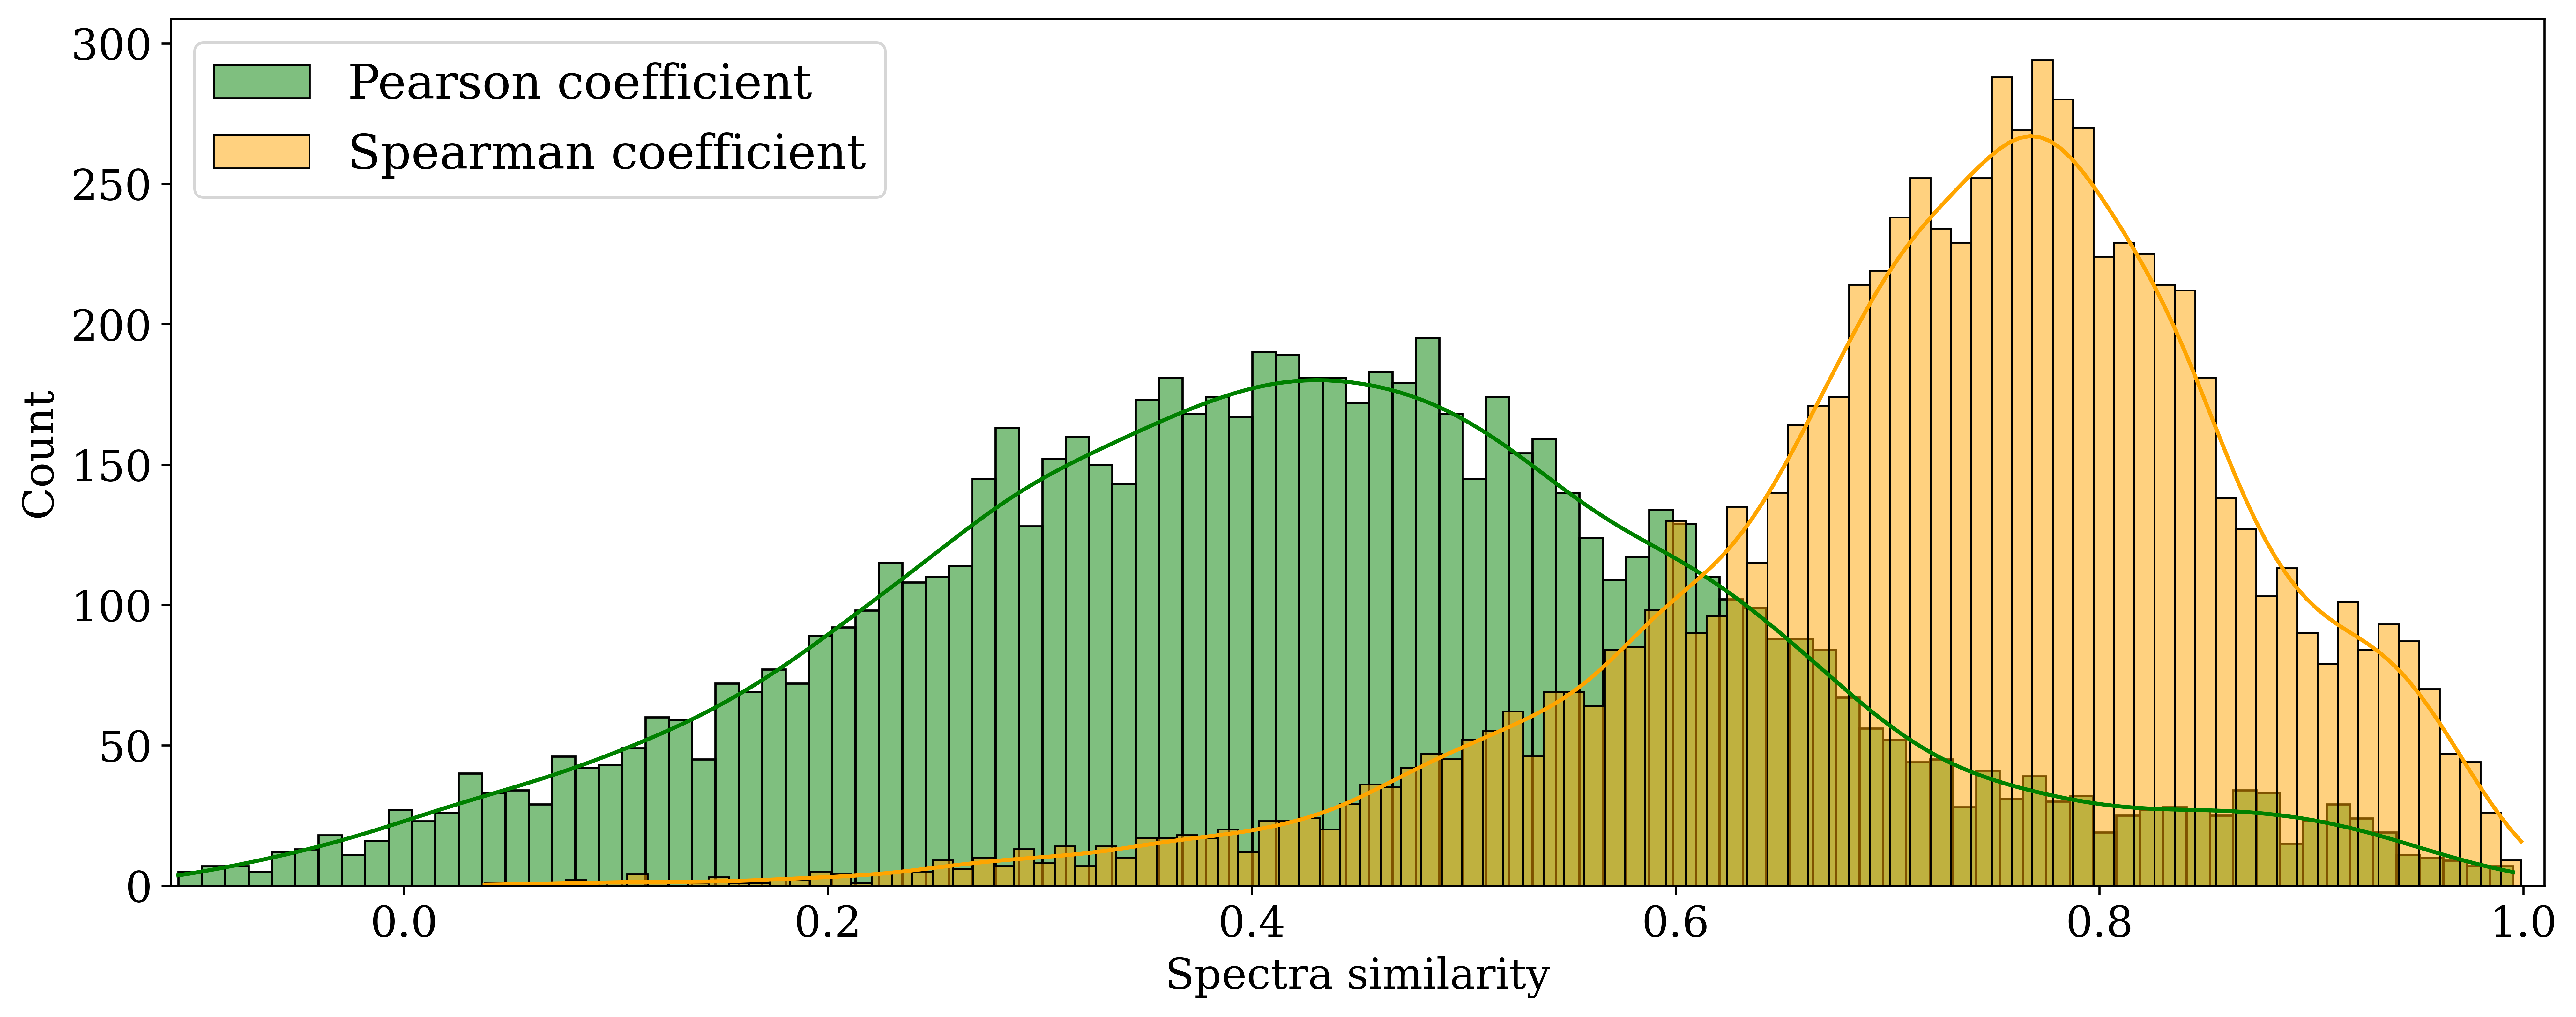

In [13]:
fig = plt.figure(figsize=(16,6), dpi = 600)
plt.rc('font', family='serif', size = 16)
#plt.title("Distribution of spectra similarity measure COR",fontsize=16)
plt.xlabel ("Spectra similarity")
sns.histplot(df_pearson, label = "Pearson coefficient" ,  kde=True, color="green",bins=100)
sns.histplot(df_spearman, label = "Spearman coefficient" , kde=True, color="orange",bins=100)
legend = plt.legend(loc='upper left', shadow=False, fontsize=18)
plt.xlim(-0.11, 1.01)
plt.show()
fig.savefig(path+"Figure. DFT IR spectra similarity histogram of Drug compounds low variance.png",  bbox_inches='tight')

### **df_cid**: pair-wise Tanimoto coefficient matrix

### **df_pair**: nearest neighbor with max Tanimoto coefficient

In [126]:
list_len = df.shape[0]
test_drug_1 = list(df_label['Drug'])
test_drug_1 = test_drug_1[0:list_len]
test_drug_2 = test_drug_1

df_cid_pearson = pd.DataFrame(0,index=test_drug_1,columns=test_drug_2)
df_cid_spearman = pd.DataFrame(0,index=test_drug_1,columns=test_drug_2)

df_pair_pearson = pd.DataFrame(0,index=test_drug_1,columns=['Pair','MaxValue'])
df_pair_spearman = pd.DataFrame(0,index=test_drug_1,columns=['Pair','MaxValue'])

In [127]:
for i,drug_1 in enumerate(test_drug_1):
    #print(i)
    if i%10 == 0:
        print(i*100/df.shape[0],'%')
    for j,drug_2 in enumerate(test_drug_2):
        #print(j)
        result =spec_COR(df.iloc[i,1:],df.iloc[j,1:])
        df_cid_pearson.loc[drug_1,drug_2] = result[0]
        df_cid_spearman.loc[drug_1,drug_2] = result[1]
    #tmpInd = df_cid.loc[cid_1,df_cid.loc[cid_1,:]!=1].idxmax()
    tmpInd1 = df_cid_pearson.loc[drug_1,drug_1 != df_cid_pearson.columns].idxmax()
    tmpValue1 = df_cid_pearson.loc[drug_1,tmpInd1]   
    df_pair_pearson.loc[drug_1,'Pair'] = tmpInd1
    df_pair_pearson.loc[drug_1,'MaxValue'] = tmpValue1
    
    tmpInd2 = df_cid_spearman.loc[drug_1,drug_1 != df_cid_spearman.columns].idxmax()
    tmpValue2 = df_cid_spearman.loc[drug_1,tmpInd2]   
    df_pair_spearman.loc[drug_1,'Pair'] = tmpInd2
    df_pair_spearman.loc[drug_1,'MaxValue'] = tmpValue2
    
df_pair_pearson = df_pair_pearson.reset_index()
df_pair_spearman = df_pair_spearman.reset_index()

0.0 %
7.874015748031496 %
15.748031496062993 %
23.62204724409449 %
31.496062992125985 %
39.37007874015748 %
47.24409448818898 %
55.118110236220474 %
62.99212598425197 %
70.86614173228347 %
78.74015748031496 %
86.61417322834646 %
94.48818897637796 %


In [128]:
df_cid_pearson.to_csv(path+"Drug DFT IR spectra Pearson matrix - low variance Unique compounds.csv")
df_pair_pearson.to_csv(path+"Drug DFT IR spectra Pearson nearest neighbor - low variance Unique compounds.csv", index=False)

In [129]:
df_cid_spearman.to_csv(path+"Drug DFT IR spectra Spearman matrix - low variance Unique compounds.csv")
df_pair_spearman.to_csv(path+"Drug DFT IR spectra Spearman nearest neighbor - low variance Unique compounds.csv", index=False)

### Heatmap and clustering of NPS reference compounds according to 
Spectra COR Matrix

In [224]:
df_matrix = pd.read_csv(path+"Drug DFT IR spectra Spearman matrix - low variance Unique compounds.csv",index_col='Unnamed: 0')

In [225]:
Data = df_matrix.values
#Data = df.iloc[:,1:].values
df_matrix.head(2)

,Heroin,Morphine,Acetylcodeine,Codeine,Hydrocodone,Oxycodone,Hydromorphone,Oxymorphone,Naltrexone,Naloxone,...,2C-T-30,2C-T-31,2C-T-33,Psilocin,DMT,DiPT,4-HO-DiPT,4-HO-MET,5-MeO-AMT,5-MeO-MiPT
Heroin,1.000000,0.673858,0.947232,0.709903,0.915433,0.890532,0.823451,0.812949,0.780869,0.720229,...,0.763271,0.802687,0.771226,0.493966,0.476274,0.538736,0.505635,0.458545,0.623394,0.679639
Morphine,0.673858,1.000000,0.740646,0.902731,0.716356,0.775392,0.823661,0.828135,0.791400,0.679906,...,0.773154,0.787940,0.757911,0.595570,0.601058,0.666228,0.751606,0.718514,0.710681,0.774057


In [226]:
method = "ward"
Z_1 = linkage(Data, method='ward')
Pdist = pdist(Data)
c, coph_dists = cophenet(Z_1, Pdist)
print(c)

0.7367358905730496


/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1008x1152 with 0 Axes>

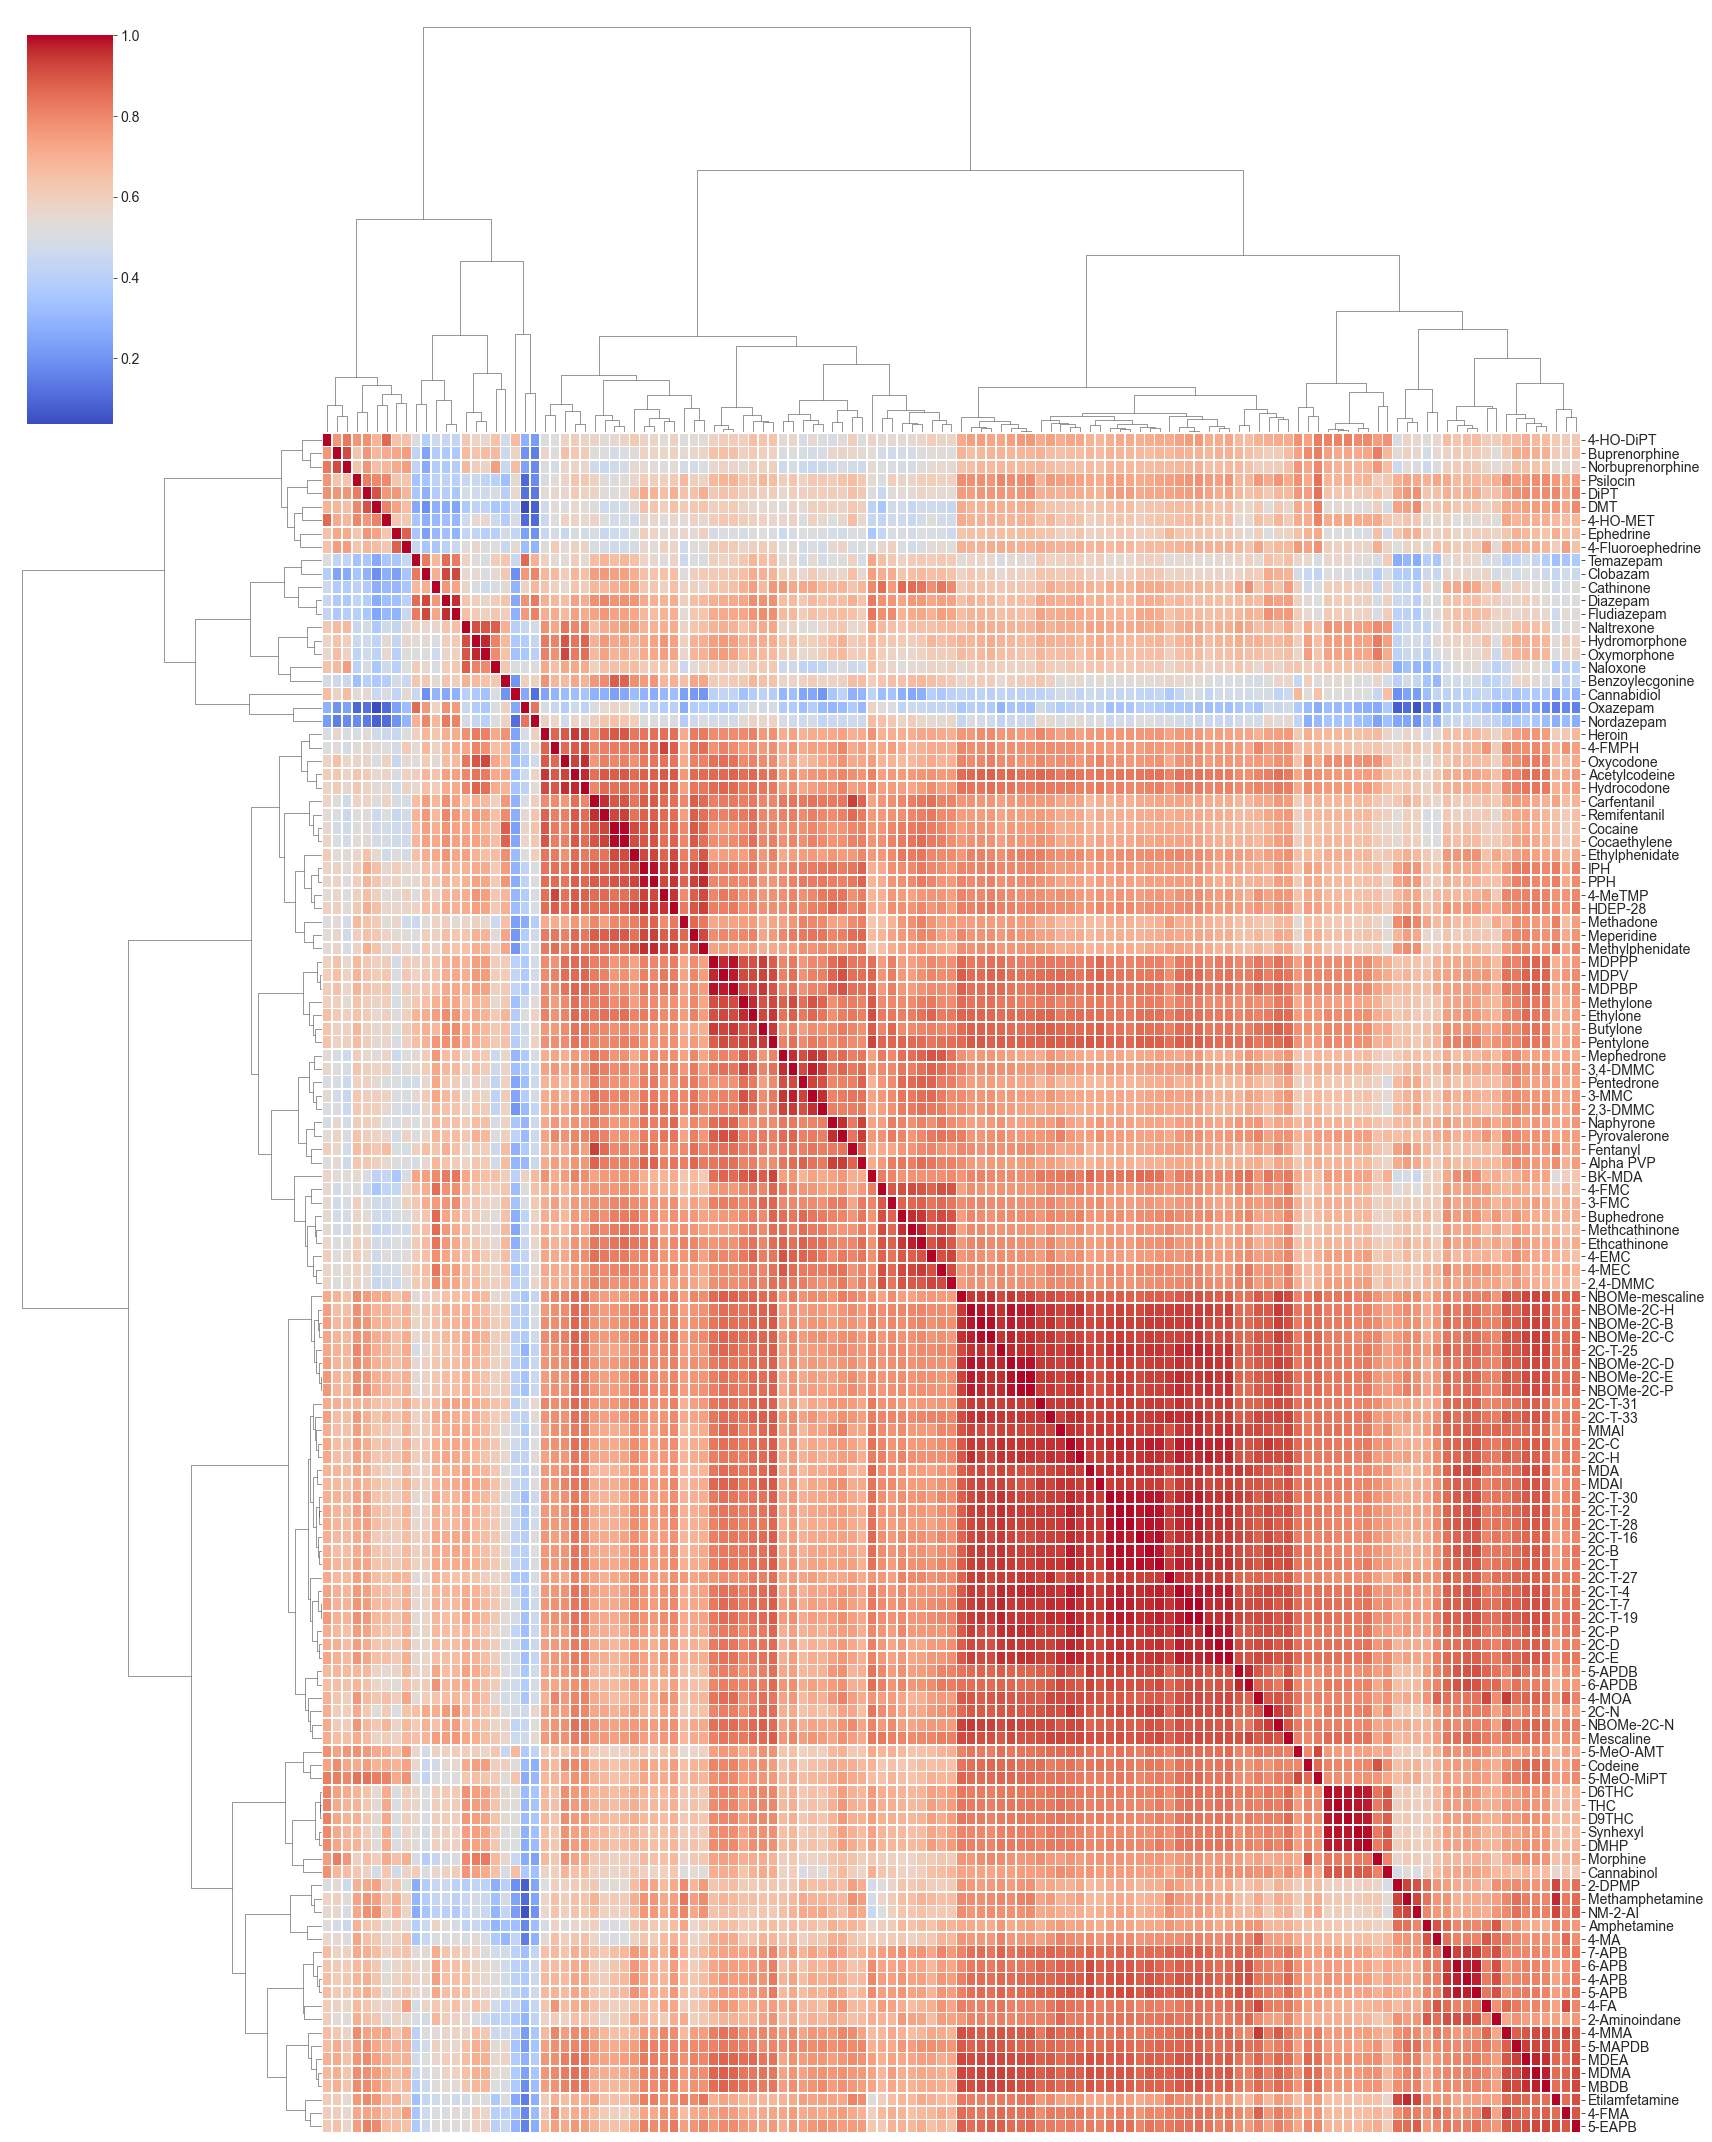

In [227]:
yticklabels= df_matrix.index
fig = plt.figure(figsize=(14,16))
plt.rc('font', family='serif', size = 14)
sns.set_style('white')
fig = sns.clustermap(Data, method=method,cmap='coolwarm',fmt='d', linewidth=.5, xticklabels=False, yticklabels=yticklabels,figsize=(24,30))
plt.rc('font', family='serif', size = 12)
plt.show()
fig.savefig(path+"Figure. Heatmap of the Spearman correlation similarity clustering of Drug compounds.png",dpi = 600,bbox_inches='tight')

In [228]:
silhouette,n_clu = list(),list()
for num_cluster in range(2, 50):
    cluster_nodes= fcluster(Z_1,num_cluster,criterion='maxclust')
    score = silhouette_score(Data, cluster_nodes, metric='euclidean')
    silhouette.append(score)
    n_clu.append(num_cluster)
print("maximum average silhouette score: %0.4f" % max(silhouette))

result = zip(n_clu,silhouette)
zipped_result = list(result)
df_result = pd.DataFrame(zipped_result,columns=['n_clusters','average_silouette'])

# optimal K with Spectra COR
df_result[df_result['average_silouette']==max(silhouette)]

maximum average silhouette score: 0.4540


,n_clusters,average_silouette
0,2,0.454025


In [229]:
df_result.head(10)

,n_clusters,average_silouette
0,2,0.454025
1,3,0.311160
2,4,0.334006
3,5,0.324212
4,6,0.337728
5,7,0.366405
6,8,0.348859
7,9,0.350357
8,10,0.359763
9,11,0.325528


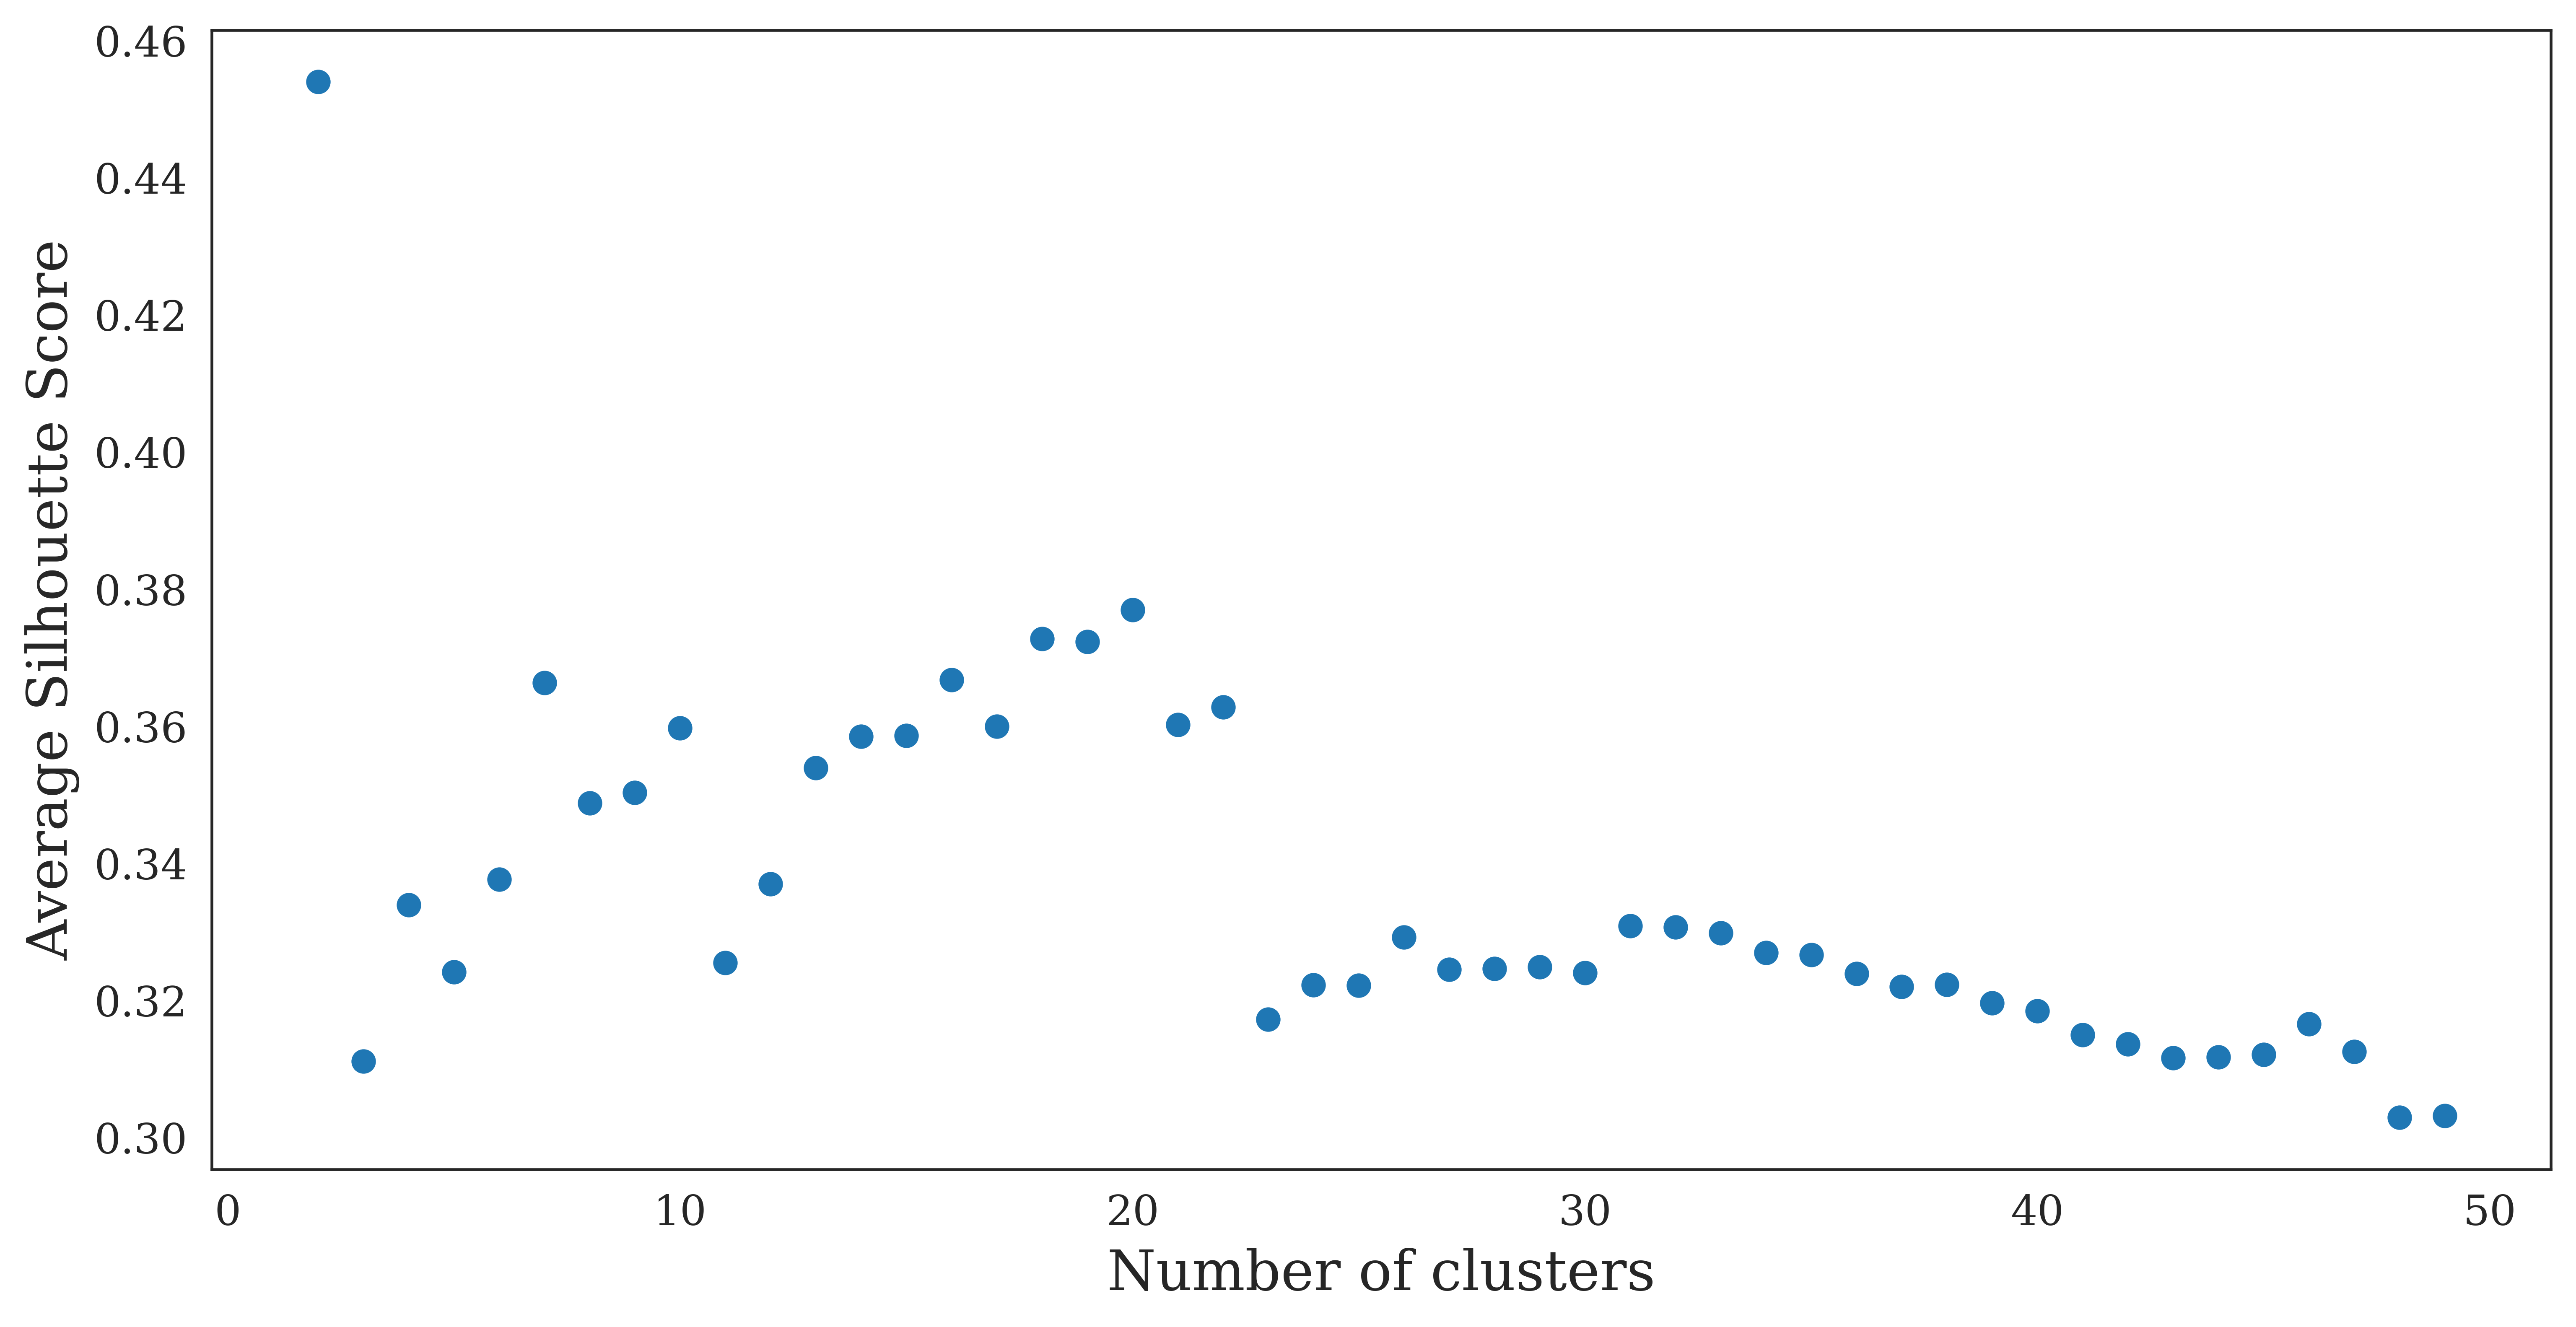

In [230]:
fig = plt.figure(figsize=(12,6), dpi = 600)
plt.rc('font', family='serif')
plt.scatter(n_clu,silhouette)
plt.xlabel("Number of clusters", fontsize=16)
plt.ylabel("Average Silhouette Score", fontsize=16)
plt.show()

fig.savefig(path+"Figure. Silhouette analysis for determining optimal clusters K using Spearman.png", bbox_inches='tight')

In [231]:
#distance cutoff
t = np.arange(0.5, 5,0.1)
silhouette= list()
clusters = list()
for i in range(len(t)):
    #print(t[i])
    #Getting cluster labels
    cluster_nodes= fcluster(Z_1,t[i],criterion='distance')
    clusters.append(max(cluster_nodes))
    #Calculate average silhouette score
    score = silhouette_score(Data, cluster_nodes, metric='euclidean')
    
    silhouette.append(score)

print("maximum average silhouette score: %0.4f" % max(silhouette))

result = zip(t,silhouette,clusters)
zipped_result = list(result)
df_result = pd.DataFrame(zipped_result,columns=['t_cutoff','average_silouette','K'])

df_result[df_result['average_silouette']==max(silhouette)]

maximum average silhouette score: 0.3770


,t_cutoff,average_silouette,K
10,1.5,0.377024,20


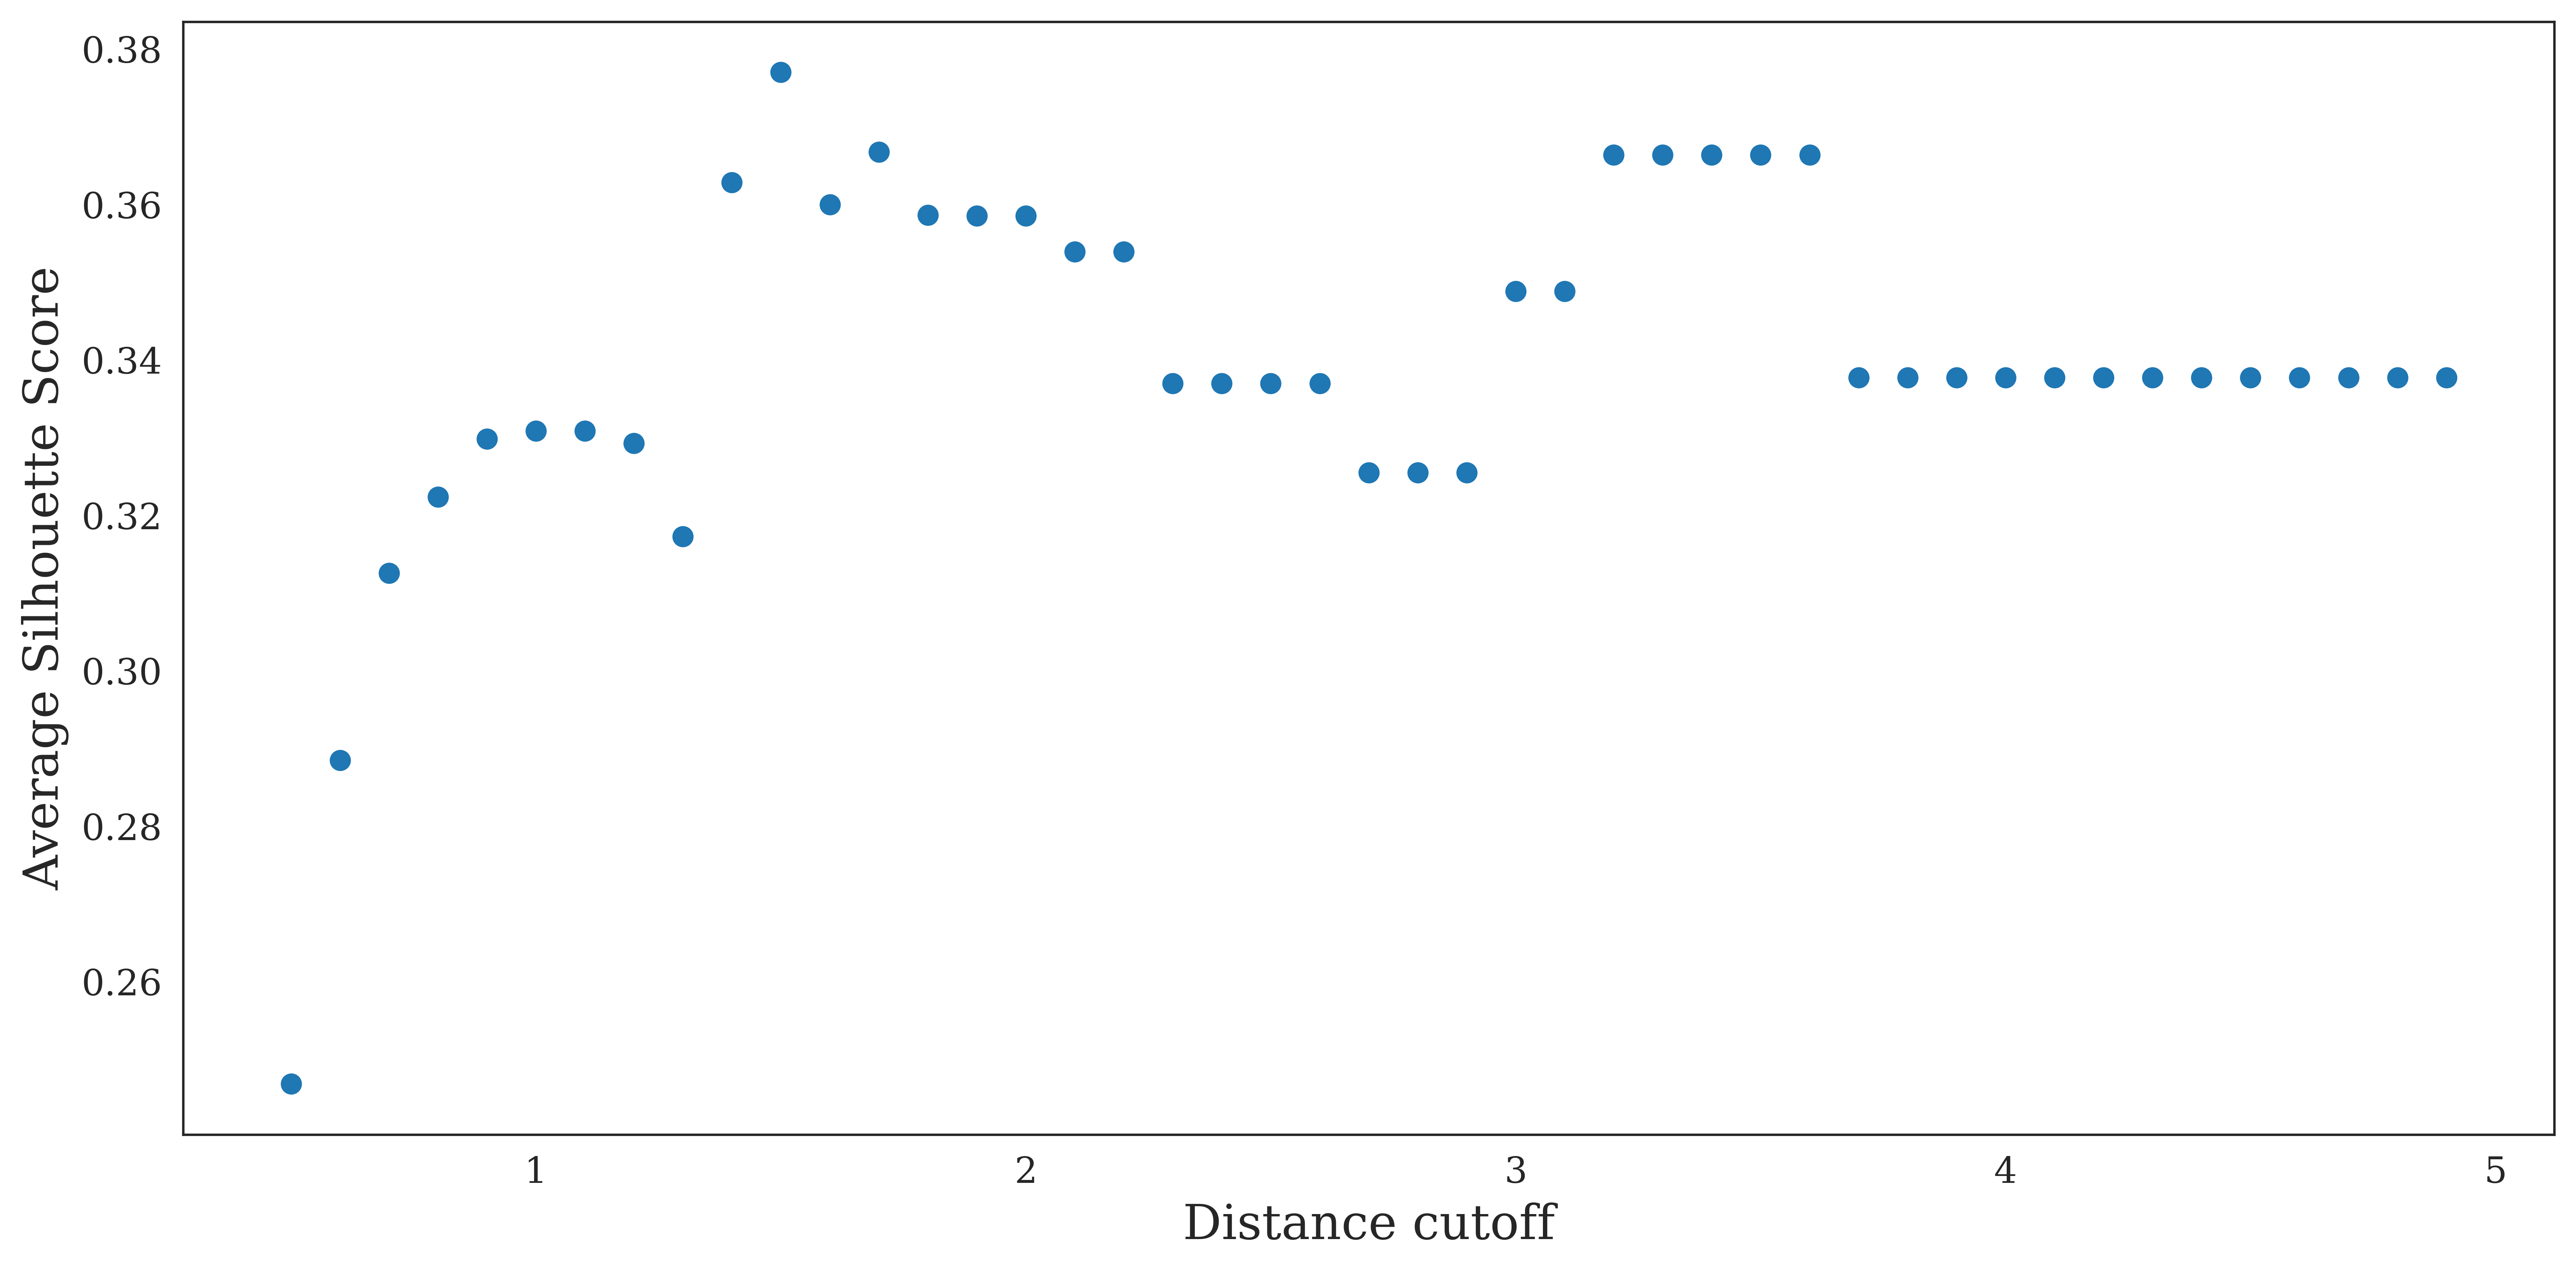

In [232]:
fig = plt.figure(figsize=(12,6), dpi = 600)
plt.rc('font', family='serif')
plt.scatter(t,silhouette)

plt.xlabel("Distance cutoff", fontsize=16)
plt.ylabel("Average Silhouette Score", fontsize=16)
fig.tight_layout()
plt.show()

fig.savefig(path+"Figure. Silhouette analysis for determining optimal clusters K using Spearman with distance cutoff.png", bbox_inches='tight')

In [233]:
cluster_metric(Data, 16, df_label.Class)

silhouette: 0.3668 ARI: 0.3159


In [216]:
df_class = pd.read_csv(path+"Drugs Canonical Smiles and Fingerprints and optimal K - Unique compounds.csv", dtype=object)

In [217]:
df_class.head()

,Name,Formula,MW,CAS,PubChem CID,RotBondCount,Conformers,Class,Pharm class,Chem core,Canonical SMILES,maccsfp,MACCS_K,MCS_K
0,Heroin,C21H23NO5,369.4,561-27-3,5462328,4,10,1,Opioids,Alkaloid,CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC(=O)C)...,0000000000000000000000000000000000000000000000...,14,9
1,Morphine,C17H19NO3,285.34,57-27-2,5288826,0,1,1,Opioids,Alkaloid,CN1CCC23C4C1CC5=C2C(=C(C=C5)O)OC3C(C=C4)O,0000000000000000000000000000000000000000000000...,14,9
2,Acetylcodeine,C20H23NO4,341.4,6703-27-1,5486550,3,3,1,Opioids,Alkaloid,CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC)CCN3C,0000000000000000000000000000000000000000000000...,14,9
3,Codeine,C18H21NO3,299.4,76-57-3,5284371,1,1,1,Opioids,Alkaloid,CN1CCC23C4C1CC5=C2C(=C(C=C5)OC)OC3C(C=C4)O,0000000000000000000000000000000000000000000000...,14,9
4,Hydrocodone,C18H21NO3,299.4,125-29-1,5284569,1,1,1,Opioids,Alkaloid,CN1CCC23C4C1CC5=C2C(=C(C=C5)OC)OC3C(=O)CC4,0000000000000000000000000000000000000000000000...,14,9


In [234]:
cluster_nodes = fcluster(Z_1,16,criterion='maxclust')

In [235]:
df_class['Spearman_K'] = pd.Series(cluster_nodes, index=df_class.index)

In [236]:
df_class

,Name,Formula,MW,CAS,PubChem CID,RotBondCount,Conformers,Class,Pharm class,Chem core,Canonical SMILES,maccsfp,MACCS_K,MCS_K,Pearson_K,Spearman_K
0,Heroin,C21H23NO5,369.4,561-27-3,5462328,4,10,1,Opioids,Alkaloid,CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC(=O)C)...,0000000000000000000000000000000000000000000000...,14,9,11,7
1,Morphine,C17H19NO3,285.34,57-27-2,5288826,0,1,1,Opioids,Alkaloid,CN1CCC23C4C1CC5=C2C(=C(C=C5)O)OC3C(C=C4)O,0000000000000000000000000000000000000000000000...,14,9,3,13
2,Acetylcodeine,C20H23NO4,341.4,6703-27-1,5486550,3,3,1,Opioids,Alkaloid,CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC)CCN3C,0000000000000000000000000000000000000000000000...,14,9,11,7
3,Codeine,C18H21NO3,299.4,76-57-3,5284371,1,1,1,Opioids,Alkaloid,CN1CCC23C4C1CC5=C2C(=C(C=C5)OC)OC3C(C=C4)O,0000000000000000000000000000000000000000000000...,14,9,3,13
4,Hydrocodone,C18H21NO3,299.4,125-29-1,5284569,1,1,1,Opioids,Alkaloid,CN1CCC23C4C1CC5=C2C(=C(C=C5)OC)OC3C(=O)CC4,0000000000000000000000000000000000000000000000...,14,9,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,DiPT,C16H24N2,244.37,14780-24-6,26903,5,4,16,Hallucinogens,Tryptamine,CC(C)N(CCC1=CNC2=CC=CC=C21)C(C)C,0000000000000000000000000000000000000000000000...,16,1,2,1
123,4-HO-DiPT,C16H24N2O,260.37,132328-45-1,21854225,5,10,16,Hallucinogens,Tryptamine,CC(C)N(CCC1=CNC2=C1C(=CC=C2)O)C(C)C,0000000000000000000000000000000000000000000000...,16,1,2,1
124,4-HO-MET,C13H18N2O,218.29,77872-41-4,21786582,4,10,16,Hallucinogens,Tryptamine,CCN(C)CCC1=CNC2=C1C(=CC=C2)O,0000000000000000000000000000000000000000000000...,16,1,2,1
125,5-MeO-AMT,C12H16N2O,204.27,1137-04-8,36906,3,10,16,Hallucinogens,Tryptamine,CC(CC1=CNC2=C1C=C(C=C2)OC)N,0000000000000000000000000000000000000000000000...,11,1,1,13


In [237]:
df_class.to_csv(path+"Drugs Canonical Smiles and Fingerprints and optimal K - Unique compounds.csv",index=False)

### ARI compare to "true class label"

* Internal: Silhoutee
* External: Jaccard, ARI

In [14]:
df = pd.read_csv(path+"Drugs Canonical Smiles and Fingerprints and optimal K - Unique compounds.csv", dtype=object)
Pearson_cid = pd.read_csv(path+"Drug DFT IR spectra Pearson matrix - low variance Unique compounds.csv",index_col="Unnamed: 0")
X_Pearson = Pearson_cid.values
Spearman_cid = pd.read_csv(path+"Drugs MCS Tanimoto matrix - Unique compounds.csv",index_col="Unnamed: 0")
#X_MCS = MCS_cid.values
print(df.shape)
class_label = df.Class.astype(str).astype(int)
df.head(2)

(127, 18)


,Name,Formula,MW,CAS,PubChem CID,RotBondCount,Conformers,Class,Pharm class,Chem core,Canonical SMILES,maccsfp,MACCS_K,MCS_K,Pearson_K,Spearman_K,Morgan_K,E3FP_K
0,Heroin,C21H23NO5,369.4,561-27-3,5462328,4,10,1,Opioids,Alkaloid,CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC(=O)C)...,0000000000000000000000000000000000000000000000...,14,9,11,7,4,12
1,Morphine,C17H19NO3,285.34,57-27-2,5288826,0,1,1,Opioids,Alkaloid,CN1CCC23C4C1CC5=C2C(=C(C=C5)O)OC3C(C=C4)O,0000000000000000000000000000000000000000000000...,14,9,3,13,4,12
